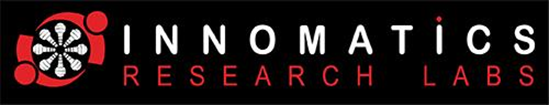

## Data Collection,Data Cleaning and EDA Project

## import The Required libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Search for relevant websites

In [28]:
url = f"https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=%20washingmachines"

## 3.Define the Problem Statement

In [30]:
requests.get(url)

<Response [200]>

### Extracting the Data

In [6]:
brand = []
Type = []
weight = []
load = []
color = []
speed = []
voltage = []
warranty = []
price = []
rating = []
for i in range(1,45):
    url = f"https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page={i}"
    print(url)
    
    
    
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    content = soup.find_all('div',class_ = '_2kHMtA')
    
    for i in content:
        
        brands = i.find('div',class_='_4rR01T')
        reg = re.findall('^\w+',brands.text)
        if len(reg)== 1:
            brand.append(reg[0])
        else:
            brand.append(np.nan)
        
        #type
        reg = re.findall('Fully\s\w+|Semi\s\w+',brands.text)
        if len(reg) == 1:
            Type.append(reg[0])
        else:
            Type.append(np.nan)
            
        #weight
        reg = re.findall('\d+\skg|\d+\.\d+\skg',brands.text)
        if len(reg) == 1:
            weight.append(reg[0])   
        else:
            weight.append(np.nan)
        
        
        #load
        reg = re.findall('Top\s\w+|Front\s\w+|Top|Front',brands.text)
        if len(reg) == 1:
            load.append(reg[0])
        else:
            load.append(np.nan)
            
        #color
        reg = re.findall('\w+,\s\w+$|\w+$',brands.text)
        if len(reg) == 1:
            color.append(reg[0])
        else:
            color.append(np.nan)
            
            
        features =i.find('ul',class_ = '_1xgFaf')
        
        #speed
        reg = re.findall('(\d+ )rpm Max Speed',features.text)
        if len(reg) == 1:
            speed.append(reg[0])
        else:
            speed.append(np.nan)
            
        #voltage    
        reg = re.findall('(\d\s)Star',features.text)
        if len(reg) == 1:
            voltage.append(reg[0])
        else:
            voltage.append(np.nan)
            
        #warranty    
        reg = re.findall('\sRating(\d)',features.text)
        if len(reg) == 1:
            warranty.append(reg[0][0])
        else:
            warranty.append(np.nan)
        '''war=i.find('ul',class_='_1xgFaf')
        reg=re.findall('(.*) Year Warranty on Product',war.text)
        try:
            warranty.append(reg[0])
        except:
            warranty.append(np.nan)'''
            
        #price
        p=i.find('div',class_= '_30jeq3 _1_WHN1')
        if p:
            reg=re.findall("\d+,\d+",p.text)
        
            price.append(reg[0])
        else:
            price.append(np.nan)
            
        #rating
       
        rat = i.find('div',class_= '_3LWZlK')
        if rat:
            rating.append(rat.text)
        else:
            rating.append(np.nan)
        
    

https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page=1
https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page=2
https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page=3
https://www.flipkart.com/search?q=washingmachines&as=on&as-sh

SSLError: HTTPSConnectionPool(host='www.flipkart.com', port=443): Max retries exceeded with url: /search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page=13 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)')))

### Create the Dataframe

In [8]:
df = pd.DataFrame({"Brand_Name":brand,
                                 "Machine_Type":Type,
                                 "Access_location":load,
                                 "Capacity":weight,
                                 "Energy_star":voltage,
                                 "Spin_Speed":speed,
                                 "Color":color,
                                 "Warranty":warranty,
                                 "Price":price,
                                 "Rating":rating})

### Export into CSV format

In [9]:
df.to_csv('WASHING_MACHINE_DATA1.csv')      #saving the dataframe in csv file (coma seperated value).
                                            #it is a text file containing data content.

## Read csv File

In [10]:
df = pd.read_csv(r"C:\Users\SRIKANTH\batch 274\WASHING_MACHINE_DATA1.csv")

In [11]:
df

,Unnamed: 0,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating


In [12]:
df['Machine_Type'].unique()

array([], dtype=object)

In [13]:
def wash(x):                          
    
    if type(x) == 'float':
        return x
    else:
        if 'Semi' in str(x):
            return 'Semi Automatic'
        elif 'Fully' in str(x):
            return 'Fully Automatic'
        else:
            return x


In [14]:
df['Machine_Type']

Series([], Name: Machine_Type, dtype: object)

In [15]:
df['Machine_Type'] = df['Machine_Type'].apply(wash)

In [248]:
df['Machine_Type'].unique()

array(['Semi Automatic', 'Fully Automatic', nan], dtype=object)

In [249]:
df['Access_location'].unique()

array(['Top Load', nan, 'Front Load', 'Top Loa', 'Front L', 'Front Lo',
       'Top load', 'Top', 'Front', 'Front Loa'], dtype=object)

In [250]:
def mach(x):
    if type(x) == 'float':
        return x
    else:
        if 'Top' in str(x):
            return 'Top Load'
        elif 'Front' in str(x):
            return 'Front Load'
        else:
            return x


In [253]:
df['Access_location']

0        Top Load
1             NaN
2        Top Load
3        Top Load
4        Top Load
          ...    
979      Top Load
980           NaN
981    Front Load
982           NaN
983    Front Load
Name: Access_location, Length: 984, dtype: object

In [254]:
df['Access_location'] = df['Access_location'].apply(mach)

In [255]:
df['Access_location'].unique()

array(['Top Load', nan, 'Front Load'], dtype=object)

In [256]:
df

,Unnamed: 0,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,0,SAMSUNG,Semi Automatic,Top Load,7.5 kg,5.0,1300.0,"Blue, Grey",2.0,"11,990",4.4
1,1,IFB,Fully Automatic,NaN,7 kg,5.0,720.0,NaN,4.0,"16,990",4.3
2,2,Thomson,Semi Automatic,Top Load,7.5 kg,5.0,NaN,"Black, Grey",2.0,"7,690",4.0
3,3,SAMSUNG,Fully Automatic,Top Load,7 kg,5.0,700.0,Grey,2.0,"17,990",4.3
4,4,realme,Fully Automatic,Top Load,7.5 kg,5.0,700.0,Grey,2.0,"11,790",4.1
...,...,...,...,...,...,...,...,...,...,...,...
979,979,LG,Semi Automatic,Top Load,6 kg,NaN,1300.0,"Black, White",NaN,"12,850",4.3
980,980,IFB,Fully Automatic,NaN,9 kg,5.0,720.0,NaN,NaN,"30,790",4.3
981,981,Voltas,Fully Automatic,Front Load,8 kg,5.0,1200.0,NaN,NaN,"24,990",3.8
982,982,DMR,NaN,NaN,1.5 kg,NaN,NaN,Black,NaN,"5,999",4.0


### Droping of unwanted columns

In [257]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [ ]:
df

## To Identify the Missing values

In [259]:
df.isna().sum()

Brand_Name           0
Machine_Type        98
Access_location    228
Capacity            11
Energy_star        142
Spin_Speed         233
Color              353
Warranty           468
Price                0
Rating              91
dtype: int64

In [260]:
df['Price'] = df['Price'].str.replace(',','')

In [261]:
df['Price'] =pd.to_numeric(df['Price'],errors = 'coerce')

In [262]:
df['Capacity'] = df['Capacity'].str.replace('kg','')  #replacing

In [263]:
df['Capacity'] =pd.to_numeric(df['Capacity'],errors = 'coerce')  

In [264]:
df.dtypes

Brand_Name          object
Machine_Type        object
Access_location     object
Capacity           float64
Energy_star        float64
Spin_Speed         float64
Color               object
Warranty           float64
Price                int64
Rating             float64
dtype: object

### Filling the missing values

In [265]:
df.select_dtypes(include = object) #to get categorical data

,Brand_Name,Machine_Type,Access_location,Color
0,SAMSUNG,Semi Automatic,Top Load,"Blue, Grey"
1,IFB,Fully Automatic,NaN,NaN
2,Thomson,Semi Automatic,Top Load,"Black, Grey"
3,SAMSUNG,Fully Automatic,Top Load,Grey
4,realme,Fully Automatic,Top Load,Grey
...,...,...,...,...
979,LG,Semi Automatic,Top Load,"Black, White"
980,IFB,Fully Automatic,NaN,NaN
981,Voltas,Fully Automatic,Front Load,NaN
982,DMR,NaN,NaN,Black


In [266]:
df['Machine_Type'] = df['Machine_Type'].fillna(df.groupby('Brand_Name')['Machine_Type'].transform(lambda x:x.mode()))

In [267]:
df['Machine_Type'].isna().sum()

98

In [268]:
df['Machine_Type'].mode()

0    Fully Automatic
Name: Machine_Type, dtype: object

In [269]:
df['Machine_Type'].fillna(df['Machine_Type'].mode()[0],inplace = True)

In [270]:
df['Machine_Type'].isna().sum()

0

In [271]:
df['Access_location'] = df['Access_location'].fillna(df.groupby('Brand_Name')['Access_location'].transform(lambda x:x.mode()))

In [272]:
df['Access_location'].isna().sum()

228

In [273]:
df['Access_location'].fillna(df['Access_location'].mode()[0],inplace = True)

In [274]:
df['Access_location'].isna().sum()

0

In [275]:
df['Color'] = df['Color'].fillna(df.groupby('Brand_Name')['Color'].transform(lambda x:x.mode()))

In [276]:
df['Color'].isna().sum()

352

In [277]:
df['Color'].mode()

0    Grey
Name: Color, dtype: object

In [278]:
df['Color'].fillna(df['Color'].mode()[0],inplace = True)

In [279]:
df['Color'].isna().sum()

0

In [280]:
df['Capacity'] = df['Capacity'].fillna(df.groupby('Brand_Name')['Capacity'].transform(lambda x:x.median()))

In [281]:
df['Capacity'].isna().sum()

0

In [282]:
df['Capacity'].fillna(df['Capacity'].median(),inplace = True)

In [283]:
df['Capacity'].isna().sum()

0

In [284]:
df['Energy_star'] = df['Energy_star'].fillna(df.groupby('Brand_Name')['Energy_star'].transform(lambda x:x.median()))

In [285]:
df['Energy_star'].isna().sum()

15

In [286]:
df['Energy_star'].fillna(df['Energy_star'].median(),inplace = True)

In [287]:
df['Energy_star'].isna().sum()

0

In [288]:
df['Spin_Speed'] = df['Spin_Speed'].fillna(df.groupby('Brand_Name')['Spin_Speed'].transform(lambda x:x.median()))

In [289]:
df['Spin_Speed'].isna().sum()

4

In [290]:
df['Spin_Speed'].fillna(df['Spin_Speed'].median(),inplace = True)

In [291]:
df['Spin_Speed'].isna().sum()

0

In [292]:
df['Warranty'] = df['Warranty'].fillna(df.groupby('Brand_Name')['Warranty'].transform(lambda x:x.median()))

In [293]:
df['Warranty'].isna().sum()

42

In [294]:
df['Warranty'].fillna(df['Warranty'].median(),inplace = True)

In [295]:
df['Warranty'].isna().sum()

0

In [296]:
df['Price'] = df['Price'].fillna(df.groupby('Brand_Name')['Price'].transform(lambda x:x.median()))

In [297]:
df['Price'].isna().sum()

0

In [298]:
df['Rating'] = df['Rating'].fillna(df.groupby('Brand_Name')['Rating'].transform(lambda x:x.median()))

In [299]:
df['Rating'].isna().sum()

6

In [300]:
df['Rating'].fillna(df['Rating'].median(),inplace = True)

In [301]:
df['Rating'].isna().sum()

0

## Remove duplicates

In [302]:
df.duplicated().sum()

441

In [303]:
df.drop_duplicates(keep = 'first',inplace = True,ignore_index = True)

In [304]:
df.duplicated().sum()

0

## cleaned Data

In [305]:
df.to_csv(r'WASHING_MACHINE_DATA1_Raw_data.csv') #raw data after filling the nan values by group by

In [311]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300,"Blue, Grey",2.0,11990,4.4
1,IFB,Fully Automatic,Top Load,7.0,5.0,720,Silver,4.0,16990,4.3
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400,"Black, Grey",2.0,7690,4.0
3,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700,Grey,2.0,17990,4.3
4,realme,Fully Automatic,Top Load,7.5,5.0,700,Grey,2.0,11790,4.1
...,...,...,...,...,...,...,...,...,...,...
538,Godrej,Fully Automatic,Top Load,6.5,5.0,700,Grey,2.0,18599,4.3
539,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,740,"Blue, Grey",2.0,12727,4.4
540,BOSCH,Fully Automatic,Top Load,6.5,5.0,680,Grey,2.0,19990,4.4
541,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,740,"White, Grey",2.0,13162,4.3


In [312]:
df['Brand_Name'].unique()

array(['SAMSUNG', 'IFB', 'Thomson', 'realme', 'Haier', 'LG', 'Voltas',
       'Whirlpool', 'ONIDA', 'MarQ', 'Intex', 'Godrej', 'MOTOROLA',
       'BOSCH', 'Panasonic', 'Hafele', 'Siemens', 'Lloyd', 'Sansui',
       'Acer', 'Motorola', 'White', 'Daenyx', 'CANDY', 'Equator', 'DMR',
       'Midea', 'TCL', 'TOSHIBA', 'BLACK', 'HILTON', 'Electrolux', 'VG',
       'Galanz', 'Wybor', 'NU', 'AISEN', 'Feltron'], dtype=object)

## Type Casting

In [313]:
df.dtypes

Brand_Name          object
Machine_Type        object
Access_location     object
Capacity           float64
Energy_star        float64
Spin_Speed           int64
Color               object
Warranty           float64
Price                int64
Rating             float64
dtype: object

In [314]:
df['Spin_Speed']=df['Spin_Speed'].astype("int64")

In [315]:
df.dtypes

Brand_Name          object
Machine_Type        object
Access_location     object
Capacity           float64
Energy_star        float64
Spin_Speed           int64
Color               object
Warranty           float64
Price                int64
Rating             float64
dtype: object

## Data Visualization

## `Uni-Variate Analysis`

**continuous**

* Histogram.
* Density Plot.
* Box Plot.
* Line chart.

**categorical**

* Bar Plot.
* Count Plot.
* Pie Chart

In [316]:
df.columns

Index(['Brand_Name', 'Machine_Type', 'Access_location', 'Capacity',
       'Energy_star', 'Spin_Speed', 'Color', 'Warranty', 'Price', 'Rating'],
      dtype='object')

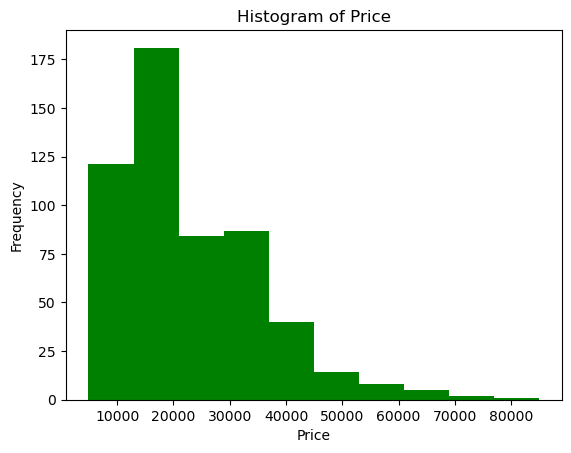

In [325]:
plt.hist(df['Price'])
plt.hist(data = df,x='Price',bins = 10,color = 'green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

* **The most price frequency ranges between 7000 to 35000.**
* **The lowest price frequency starts from nearly 70000.**
* **The frequency is gradually increasing from 14000 to 19000.**
* **The frequency is gradually decreasing from around 20000.**

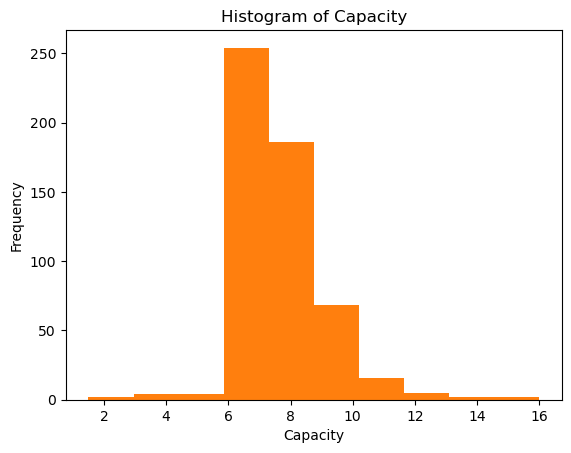

In [180]:
plt.hist(df['Capacity'])
plt.hist(data = df,x = 'Capacity',bins = 10)
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.title('Histogram of Capacity')
plt.show()

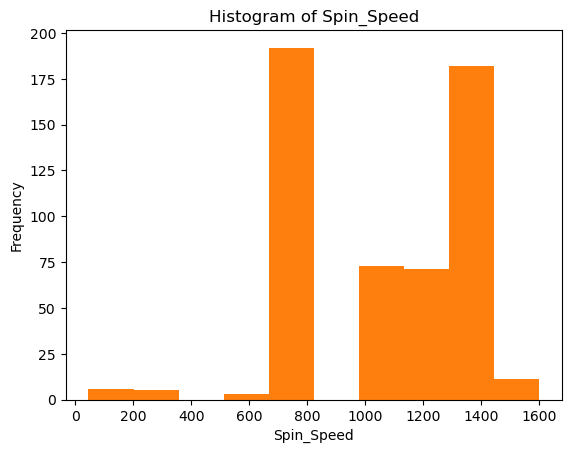

In [181]:
plt.hist(df['Spin_Speed'])
plt.hist(data = df,x = 'Spin_Speed')
plt.xlabel('Spin_Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Spin_Speed')
plt.show()

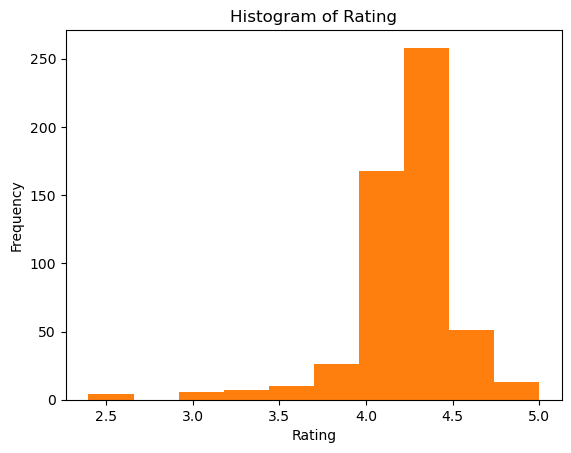

In [182]:
plt.hist(df['Rating'])
plt.hist(data = df,x = 'Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Rating')
plt.show()

<Axes: xlabel='Capacity', ylabel='Count'>

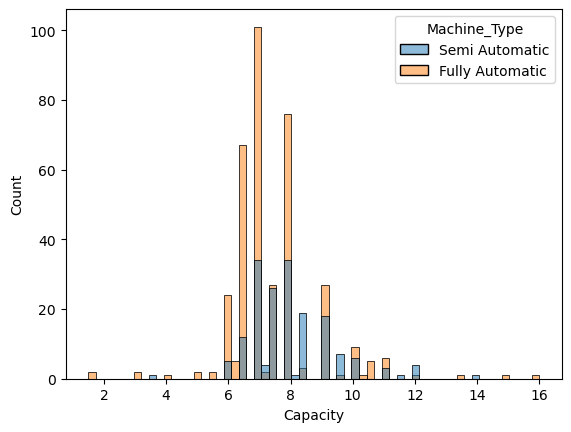

In [183]:
sns.histplot(data=df,x='Capacity',hue='Machine_Type')

<Axes: xlabel='Spin_Speed', ylabel='Count'>

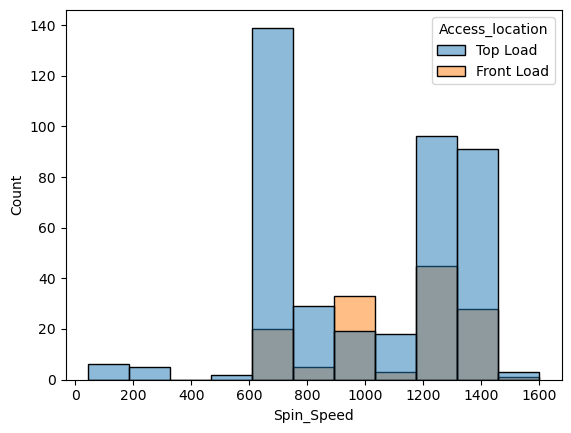

In [184]:
sns.histplot(data = df,x = 'Spin_Speed',hue = 'Access_location')

In [185]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300,"Blue, Grey",2.0,11990,4.4
1,IFB,Fully Automatic,Top Load,7.0,5.0,720,Silver,4.0,16990,4.3
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400,"Black, Grey",2.0,7690,4.0
3,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700,Grey,2.0,17990,4.3
4,realme,Fully Automatic,Top Load,7.5,5.0,700,Grey,2.0,11790,4.1
...,...,...,...,...,...,...,...,...,...,...
538,Godrej,Fully Automatic,Top Load,6.5,5.0,700,Grey,2.0,18599,4.3
539,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,740,"Blue, Grey",2.0,12727,4.4
540,BOSCH,Fully Automatic,Top Load,6.5,5.0,680,Grey,2.0,19990,4.4
541,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,740,"White, Grey",2.0,13162,4.3


## Density Plot

* To check the data distribution 

In [186]:
df['Capacity'].unique()

array([ 7.5 ,  7.  ,  6.5 ,  9.  ,  8.  ,  6.  ,  8.5 ,  6.2 ,  7.25,
       11.  , 10.  ,  9.5 , 10.5 ,  5.  , 11.5 ,  8.2 , 12.  , 10.2 ,
        3.6 ,  5.5 , 14.  , 15.  ,  7.2 ,  1.5 , 16.  ,  4.  , 13.5 ,
        3.  ])

<Axes: xlabel='Price', ylabel='Density'>

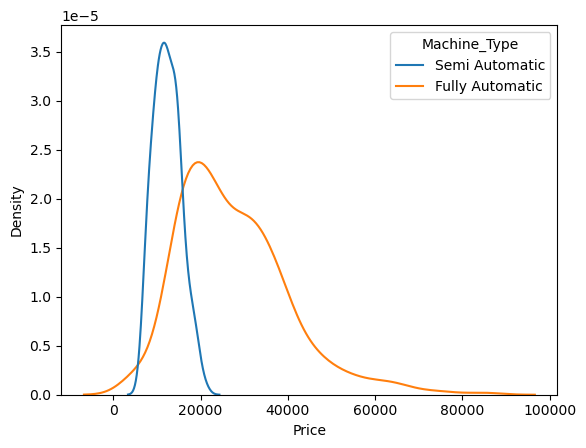

In [322]:
sns.kdeplot(data = df,x ='Price',hue = 'Machine_Type' )

## Box Plot 

* To find the outliers

<Axes: xlabel='Capacity', ylabel='Machine_Type'>

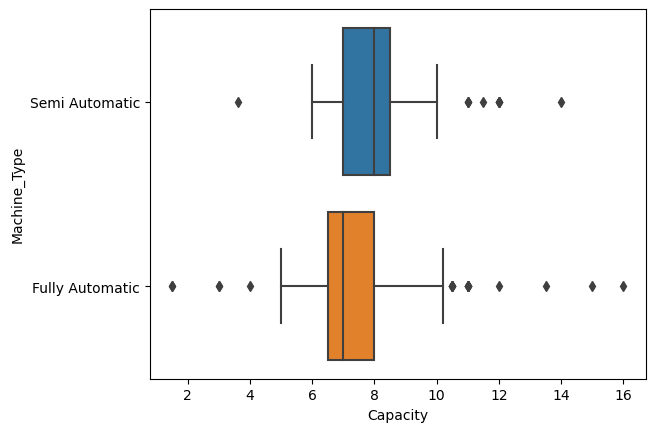

In [188]:
sns.boxplot(data =df ,x = 'Capacity',y = 'Machine_Type')

* from the box plot we can  find the outliers 
* Here the we extacted the capacity of washing Machines of Fully Automatic and Semi Automatic
* Here we got the outliers Which  are below 5 kg  and above 10 kg capacity but this cannot considered as outliers as per domain knowledge

<Axes: xlabel='Price', ylabel='Machine_Type'>

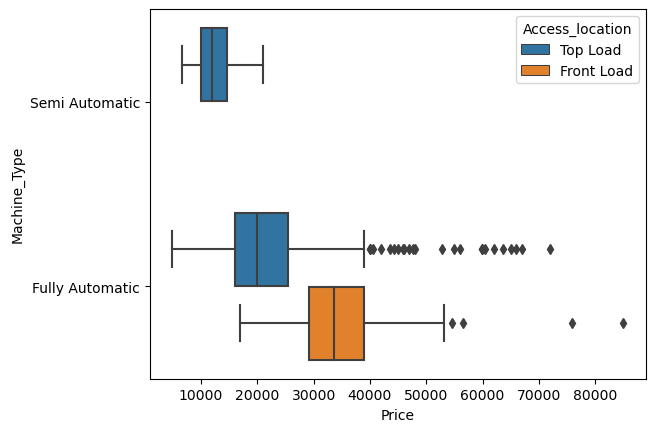

In [189]:
sns.boxplot(data =df ,x = 'Price',y = 'Machine_Type',hue = 'Access_location')

### Categorical

<Axes: xlabel='Spin_Speed'>

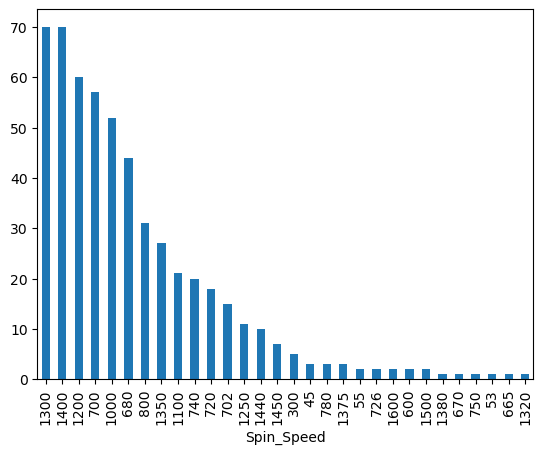

In [190]:
df['Spin_Speed'].value_counts().plot(kind = 'bar')

*from the bar plot , the  we can visualise the count of  spin_Speed  
*Here  the Highest  Number of counts of  Spin_Speed are 1300  and 1400 ,the lowest counts of the Spin_speed is 1320

### Count Plot

* To campare the displays and frequencies,counts

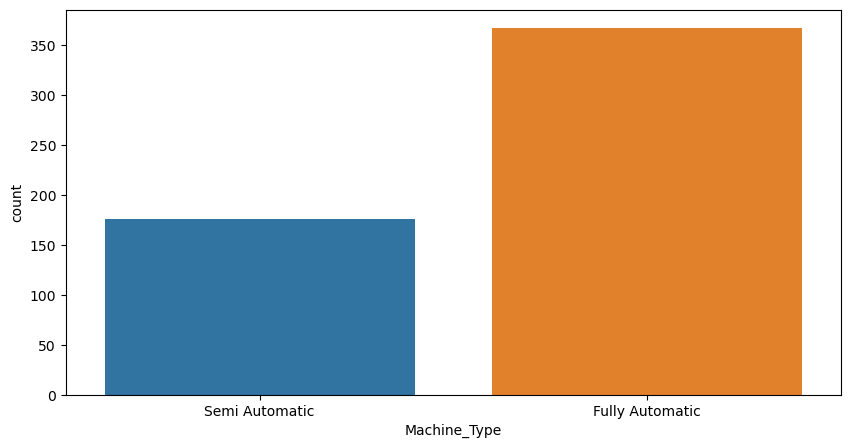

In [191]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,x = 'Machine_Type')
plt.show()

*by using the count plot, comparing the Machine_Types,here the fully Automatic Machines are higher then the Semi Automatic

<Axes: xlabel='Access_location', ylabel='count'>

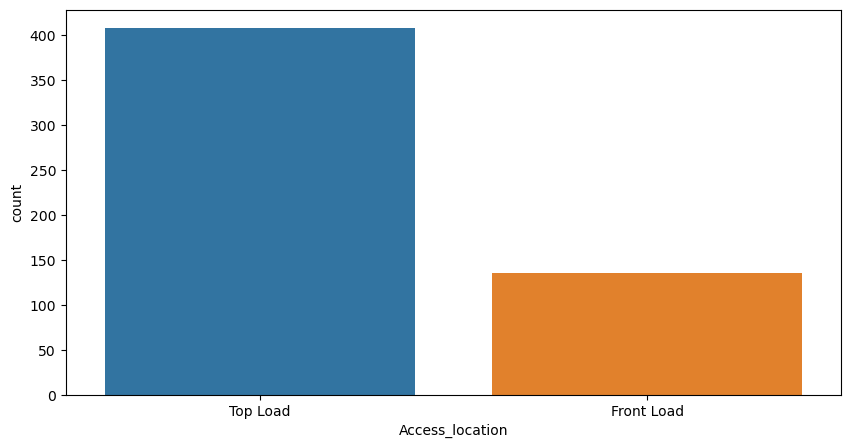

In [192]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,x = 'Access_location')

## pie chart

In [84]:
df['Brand_Name'].value_counts()

Brand_Name
SAMSUNG       74
Whirlpool     58
IFB           53
LG            51
BOSCH         41
Godrej        39
Haier         37
Lloyd         32
Voltas        30
Panasonic     20
ONIDA         15
Thomson       12
Siemens        8
MOTOROLA       7
White          6
TOSHIBA        5
realme         5
MarQ           5
DMR            5
Equator        4
TCL            4
Sansui         4
Midea          3
Acer           3
Intex          3
Feltron        3
CANDY          2
Motorola       2
Hafele         2
BLACK          2
Daenyx         1
HILTON         1
Electrolux     1
VG             1
Galanz         1
Wybor          1
NU             1
AISEN          1
Name: count, dtype: int64

li = ['realme','White','MarQ','Siemens','MOTOROLA','Intex','Acer','Equator','Midea','CANDY','FOXSKY','Daenyx','TCL',
      'BLACK','Sansui','Motorola','DMR','Feltron','InnoQ','HILTON','Singer','Electrolux','Galanz','VG','Wybor','Khaitan',
      'Kelvinator','TOSHIBA','Hafele','STARSHINE']
def brand(i):
        if i in li:
            return 'others'
        else:
            return i

df['Brand_Name'] = df['Brand_Name'].apply(brand)

df['Brand_Name'].value_counts()

In [94]:
val = [0,0,0,0,0,0,0,0,0,0,0,0.3,0.5,0.7,0.9]

plt.pie(df['Brand_Name'].value_counts(),labels =df['Brand_Name'].unique(),autopct = '%.1f',explode = val)
plt.show()

In [194]:
val = [0,0,0,0,0,0,0,0,0,0]

([<matplotlib.patches.Wedge at 0x1f555d01d90>,
 [Text(0.9466139581808787, 0.5602874388892988, 'SAMSUNG'),
  Text(0.09125389326378373, 1.096208341039331, 'IFB'),
  Text(-0.7241599104754214, 0.8280050869772659, 'Thomson'),
  Text(-1.0943821651069843, 0.11103007113277874, 'realme'),
  Text(-0.9300354796634351, -0.5873959538226361, 'Haier'),
  Text(-0.4582698423081585, -0.999994375799612, 'LG'),
  Text(0.13077043922749637, -1.0921991998826257, 'Voltas'),
  Text(0.6368856399203061, -0.8968704932504483, 'Whirlpool'),
  Text(0.9624025587152959, -0.5327112867006402, 'ONIDA'),
  Text(1.0885451979448353, -0.158333041501891, 'MarQ')],
 [Text(0.5163348862804792, 0.3056113303032539, '17.01'),
  Text(0.049774850871154755, 0.5979318223850896, '13.33'),
  Text(-0.39499631480477526, 0.4516391383512359, '12.18'),
  Text(-0.5969357264219913, 0.06056185698151567, '11.72'),
  Text(-0.5072920798164191, -0.3203977929941651, '9.43'),
  Text(-0.24996536853172277, -0.5454514777088793, '8.97'),
  Text(0.07132933

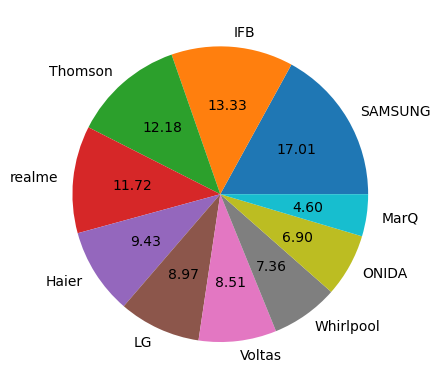

In [196]:
plt.pie(df['Brand_Name'].value_counts()[0:10],labels = df['Brand_Name'].unique()[0:10],autopct = "%.2f",explode = val)

* from the pie chart , here we can see the  visualization of different brands  and their percentage 
* Here Samsung brand has the highest percentage in washing machine sector and lowest is Marq and Onida 

## Bi-Variate Analysis

### Categorical vs categorical

* understand the data and then apply data visualization/statistical measure
* it is used for finding the insights or hidden information from two columns at a time

In [197]:
df.columns

Index(['Brand_Name', 'Machine_Type', 'Access_location', 'Capacity',
       'Energy_star', 'Spin_Speed', 'Color', 'Warranty', 'Price', 'Rating'],
      dtype='object')

In [198]:
pd.crosstab(df['Machine_Type'],df['Access_location'])

Access_location,Front Load,Top Load
Machine_Type,,
Fully Automatic,135,232
Semi Automatic,0,176


[Text(0.5, 1.0, 'Average Rating of each brand')]

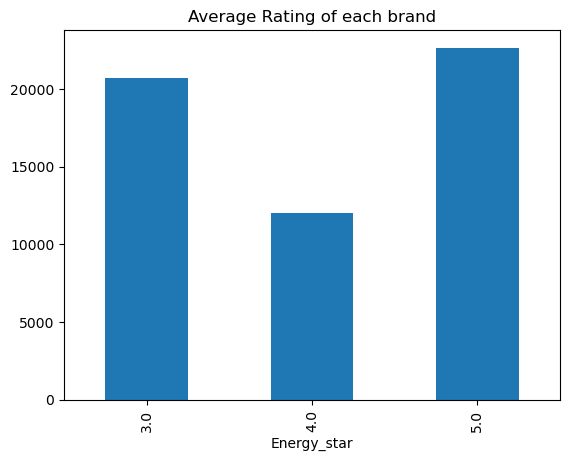

In [200]:
df.groupby('Energy_star')['Price'].mean().plot(kind = 'bar').set(title = 'Average Rating of each brand')

### Numerical vs Numerical

* scatterplot is going to find out the relationship between the two continuous variables

<Axes: xlabel='Price', ylabel='Rating'>

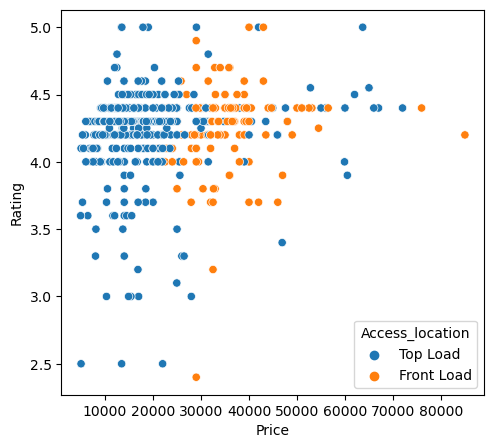

In [220]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df,x = 'Price', y = 'Rating',hue = 'Access_location')

**from the above scatter plot we extracted the data which rating having more than 4.5 and price which is less than 20000 
to get the best brands with less expensive**

# extrated the best data by using boolean indexing

In [225]:
df_3=df[(df['Rating']>4.5) & (df['Price'] < 30000)].reset_index()
df_3.drop('index',axis = 1, inplace = True)
df_3

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,Haier,Semi Automatic,Top Load,8.0,5.0,1300,Multicolor,2.0,10490,4.6
1,Siemens,Fully Automatic,Front Load,7.0,5.0,1000,Grey,2.0,28990,4.9
2,Voltas,Semi Automatic,Top Load,8.5,5.0,1300,"Grey, White",2.0,13390,5.0
3,SAMSUNG,Semi Automatic,Top Load,11.5,5.0,1300,Red,2.0,18900,5.0
4,Panasonic,Semi Automatic,Top Load,12.0,5.0,702,Multicolor,1.0,18400,4.6
5,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300,"Grey, Red",2.0,12480,4.8
6,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700,Grey,2.0,19000,5.0
7,Haier,Fully Automatic,Top Load,6.5,5.0,1000,Grey,1.0,20290,4.7
8,Whirlpool,Semi Automatic,Top Load,8.0,5.0,1100,Red,2.0,12450,4.7
9,Lloyd,Semi Automatic,Top Load,7.5,5.0,1250,Maroon,2.0,13490,5.0


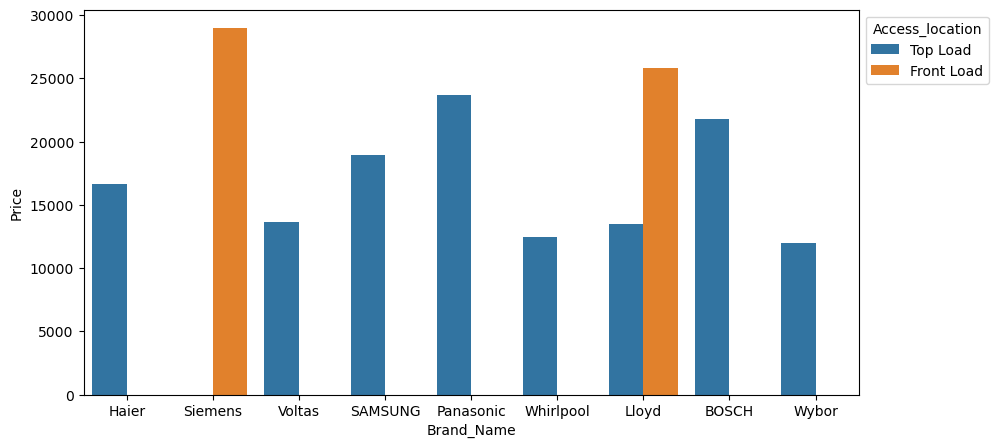

In [327]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Access_location', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

* from the above we see  bar plot based up on the price , brand_name and hue 
* hue = determines which column in the data frame should be used for colour encoding.
* from the bar plot the Voltas,Whirlpool and Wybor has  top load machine and the Siemens,LG brands has front load washing     machine, remaing washing machine brands has both top load and front load washing machines.
* here we see in haier,Samsung and other brands has both top load and front load access_location and while comparing the topload and frontload,the topload price is less than frontload price in all brands

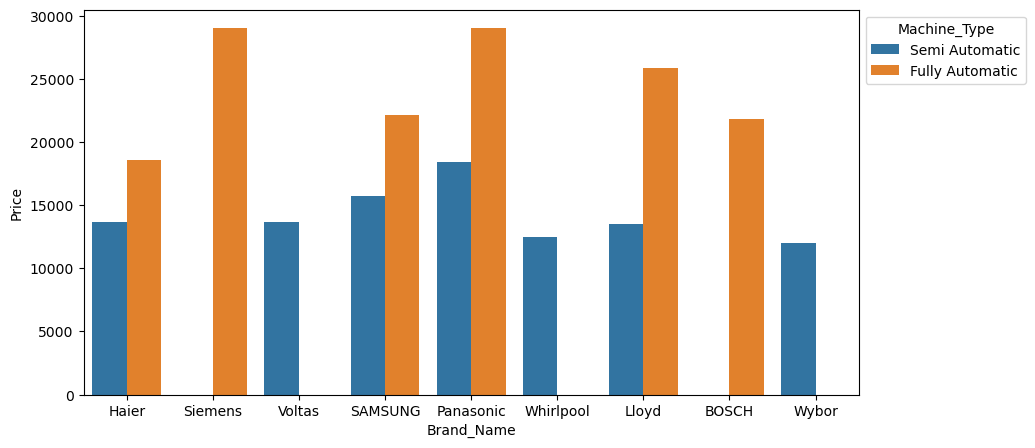

In [328]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Machine_Type', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

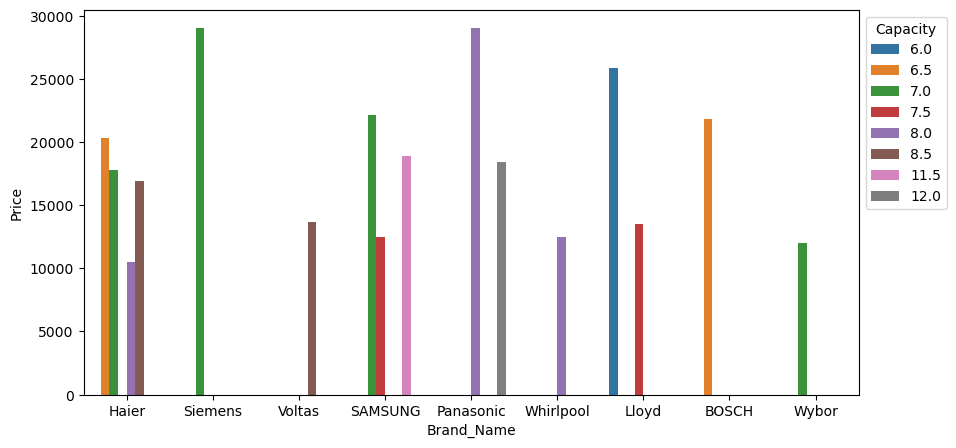

In [229]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Capacity', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

* from the above we see barplot based upon hte brandname,orice and capicity
* In haier and samsung brands, there are 3 types of capacity washing machines and other brands have single capacity washing   machine
* The highest capacity washing machine is panasonic.and the lowest capacity washine manchines are in haier,Bosch
* The highest average price and highest capacity washine manchine is panasonic.

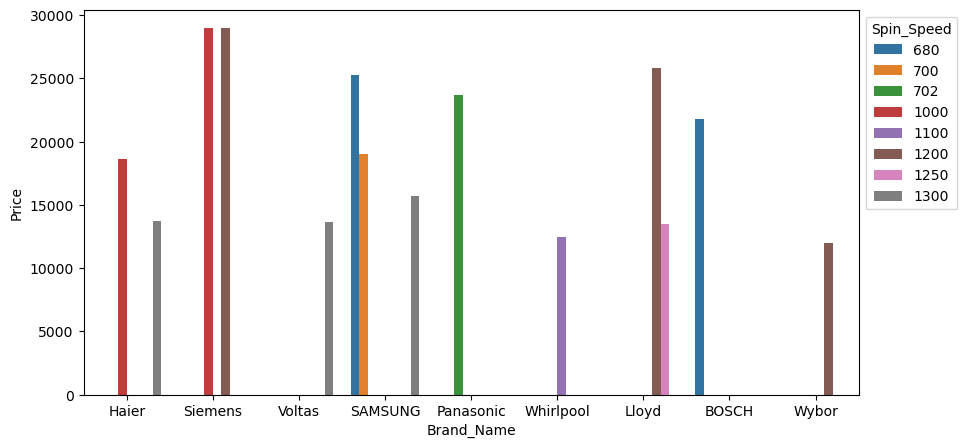

In [230]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Spin_Speed', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

* from the bar plot ,
* here extacting the spin_speed of different brands along with Price
* Some brands have two types of Spin_speed and remaining brands  have only one Spin_Speed 
* the highest spin speed can be obeserved in haier,voltas and samsung washing machines with low price around 15000.
* In the samsung washing machine we observe that lowest spin speed with high price and highest spin speed with low price.
* so from the barplot  I conclude that in samsung washing machine we have highest spin speed with low price

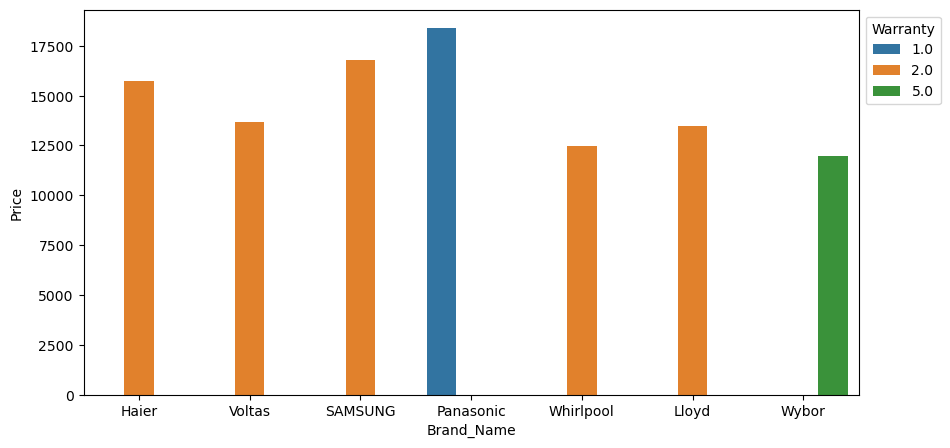

In [209]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Warranty', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

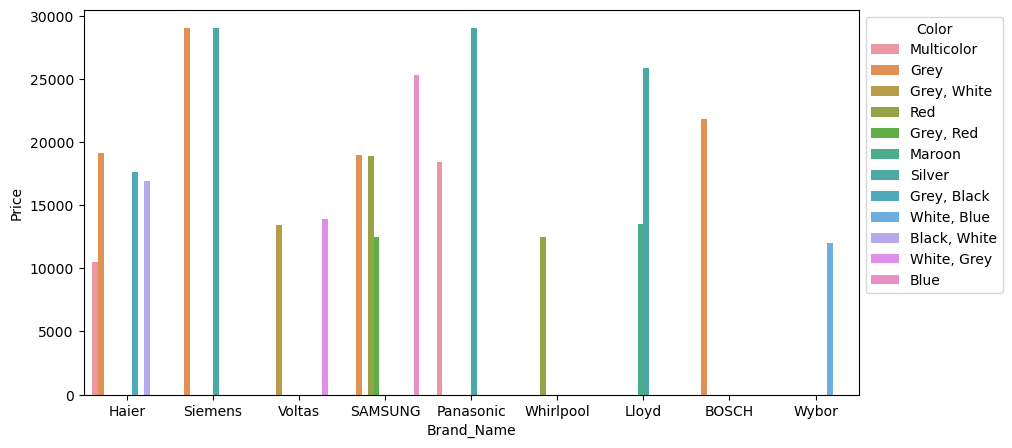

In [329]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Color', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

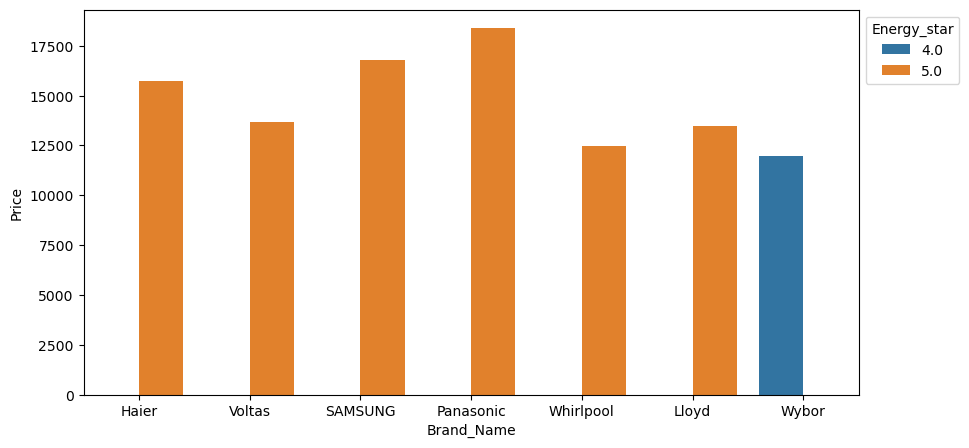

In [207]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Energy_star', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

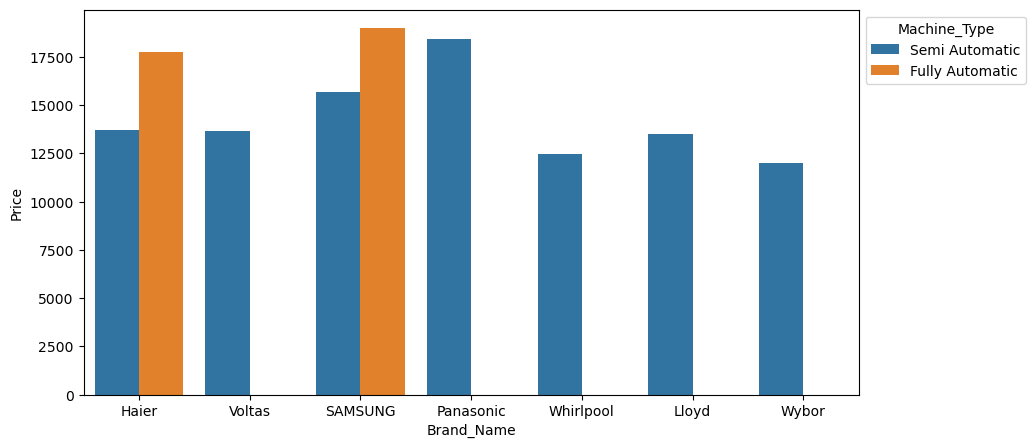

In [208]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df_3, x = 'Brand_Name', y = 'Price', hue='Machine_Type', errorbar=None)   # done
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

* all Brands have in common Semi Automatic 
* Haier and Samsung washing machine has both Fully Automatic and Semi Automatic
* Brands which have Fully Automatic, thier Prices are above 15000.

[Text(0.5, 1.0, 'Average Rating of each brand')]

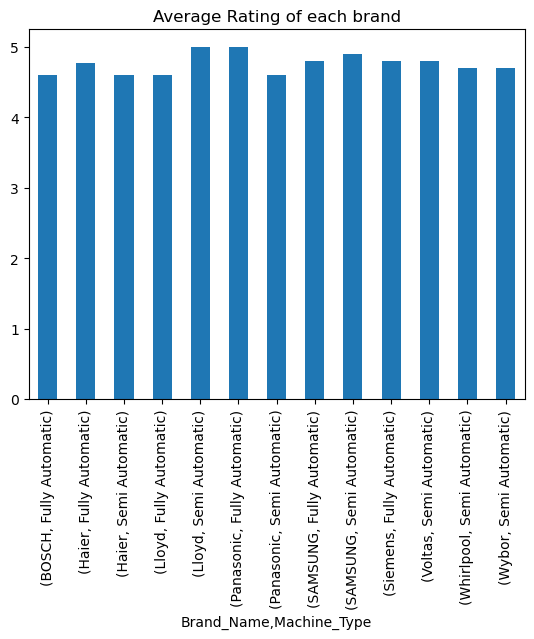

In [231]:
df_3.groupby(['Brand_Name','Machine_Type'])['Rating'].mean().plot(kind = 'bar').set(title = 'Average Rating of each brand')

**Here it shows the average price of each brand by groupby the brand name and the price in the form of barplot**

[Text(0.5, 1.0, 'Average Rating of each brand')]

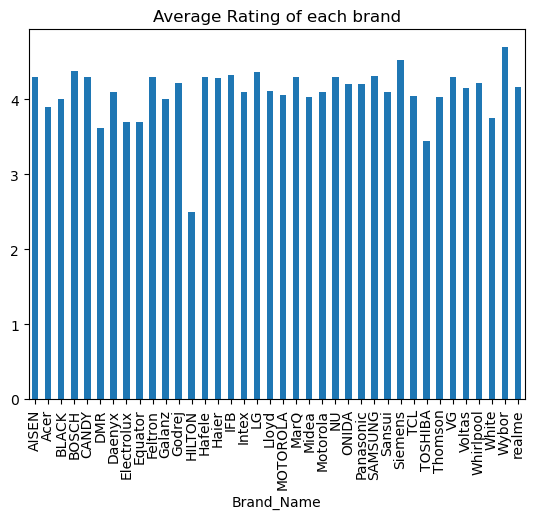

In [240]:
df.groupby('Brand_Name')['Rating'].mean().plot(kind = 'bar').set(title = 'Average Rating of each brand')

[Text(0.5, 1.0, 'Average price of each brand')]

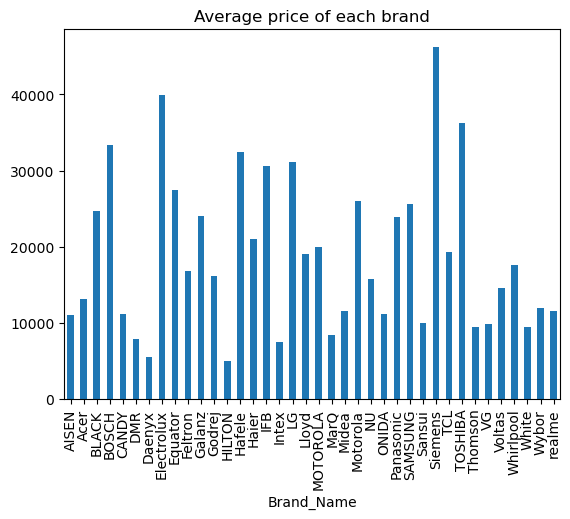

In [241]:
df.groupby('Brand_Name')['Price'].mean().plot(kind = 'bar').set(title = 'Average price of each brand')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


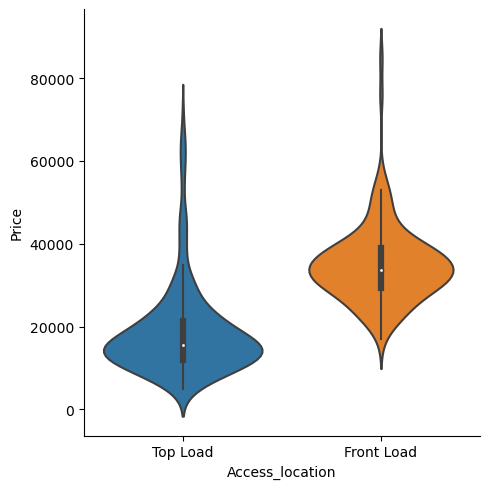

In [234]:
sns.catplot(data = df,x = 'Access_location',y = 'Price',kind = 'violin')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


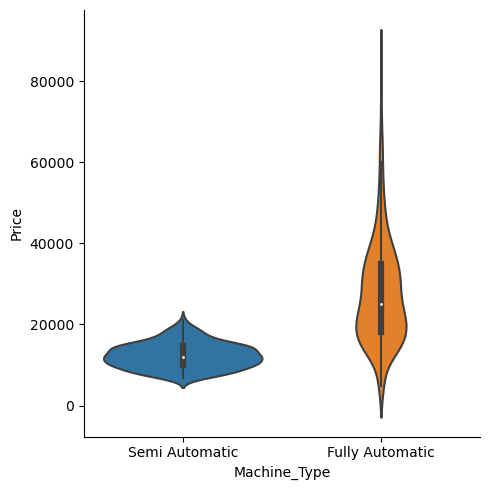

In [235]:
sns.catplot(data = df,x = 'Machine_Type',y = 'Price',kind = 'violin')

### `Categorical vs Numerical`

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


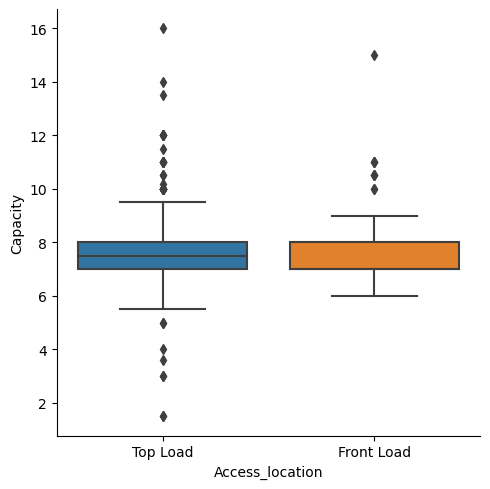

In [236]:
sns.catplot(data = df,x = 'Access_location',y = 'Capacity',kind = 'box')

In [237]:
df.head()

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300,"Blue, Grey",2.0,11990,4.4
1,IFB,Fully Automatic,Top Load,7.0,5.0,720,Silver,4.0,16990,4.3
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400,"Black, Grey",2.0,7690,4.0
3,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700,Grey,2.0,17990,4.3
4,realme,Fully Automatic,Top Load,7.5,5.0,700,Grey,2.0,11790,4.1


## `Multivariate Analysis`
* **finding the relationship between different multiple variable**

In [238]:
df.corr(numeric_only = True)

,Capacity,Energy_star,Spin_Speed,Warranty,Price,Rating
Capacity,1.000000,0.029635,0.254852,-0.056367,0.207164,0.031380
Energy_star,0.029635,1.000000,0.032311,-0.010223,0.024713,-0.049296
Spin_Speed,0.254852,0.032311,1.000000,-0.045024,-0.064597,0.024701
Warranty,-0.056367,-0.010223,-0.045024,1.000000,0.170686,0.099184
Price,0.207164,0.024713,-0.064597,0.170686,1.000000,0.145208
Rating,0.031380,-0.049296,0.024701,0.099184,0.145208,1.000000


<Axes: >

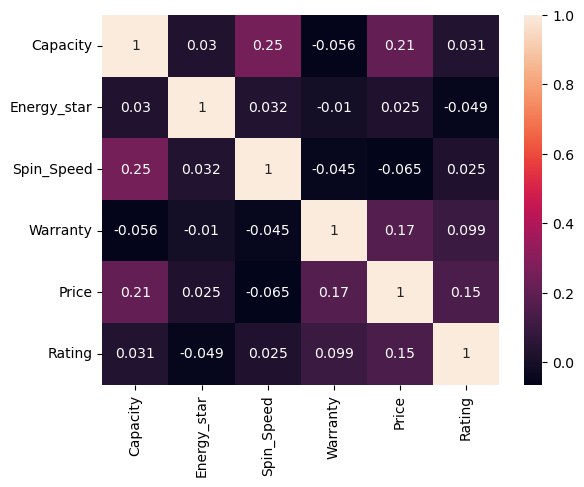

In [239]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

##### `Insights` --

* **The relationship between `Price` and `Capacity` is very positive week relationship.**
* **If the `Capacity` increases automatically `Price` also increases.**
* **The relationship between `Price` and `Spin-Speed` is negative week relationship.**
* **If the `Spin-Speed` increases automatically `price` also increases**
* **The relationship between `Rating` and `Price` is very positive week relationship.**

### Web Scraping and Eda Project

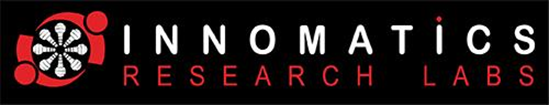